# Standard scaling, 
also known as standardization, is a preprocessing technique used to transform the features of a dataset so that they have a mean of zero and a standard deviation of one. This process ensures that each feature contributes equally to the analysis or model training, especially when the features have different units or scales. Standard scaling is commonly used in machine learning to improve the performance of algorithms that rely on distance measurements, such as k-nearest neighbors (KNN) and support vector machines (SVM).

In [248]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

# make an example dataset

df = {
    'age': [25, 30, 35, 40, 45],
    'height': [165, 170, 175, 180, 185],
    'weight': [55, 60, 65, 70, 75]
}


df = pd.DataFrame(df)
df

,age,height,weight
0,25,165,55
1,30,170,60
2,35,175,65
3,40,180,70
4,45,185,75


In [249]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df,columns=df.columns)
scaled_df


,age,height,weight
0,-1.414214,-1.414214,-1.414214
1,-0.707107,-0.707107,-0.707107
2,0.000000,0.000000,0.000000
3,0.707107,0.707107,0.707107
4,1.414214,1.414214,1.414214


# Min Max scaler

In [250]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df,columns=df.columns)
scaled_df

,age,height,weight
0,0.00,0.00,0.00
1,0.25,0.25,0.25
2,0.50,0.50,0.50
3,0.75,0.75,0.75
4,1.00,1.00,1.00


# Max Absolute scaler

In [251]:
scaler = MaxAbsScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df,columns=df.columns)
scaled_df

,age,height,weight
0,0.555556,0.891892,0.733333
1,0.666667,0.918919,0.800000
2,0.777778,0.945946,0.866667
3,0.888889,0.972973,0.933333
4,1.000000,1.000000,1.000000


# Mostly we use standard scaler for standardization and min max scaler for algorithems that not deals with negative (-) values

# Normalization and non- linear Data

In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [253]:
# Generate non normal data (Exponential Distriution)
np.random.seed(0)
df = np.random.exponential(size=1000, scale=2)
df = pd.DataFrame(df, columns=["values"])
print(df.min())
print(df.max())



values    0.001092
dtype: float64
values    17.122062
dtype: float64


<Axes: xlabel='values', ylabel='Count'>

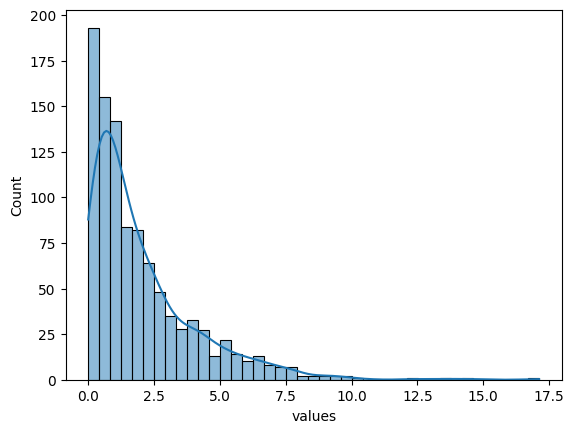

In [254]:
sns.histplot(df['values'],kde=True)

In [255]:
from sklearn.preprocessing import PowerTransformer , QuantileTransformer

pt_boxcox = PowerTransformer(method="box-cox",standardize=False)
pt_yeo_jhonson = PowerTransformer(method="yeo-johnson")
pt_normal =  QuantileTransformer(output_distribution='normal')

# For box-cox method data must be positive

df['Box_cox'] = pt_boxcox.fit_transform(df[["values"]] + 1 )
df['yeo_jhonson'] = pt_yeo_jhonson.fit_transform(df[['values']])
df['Normal'] = pt_normal.fit_transform(df[['values']])
df

,values,Box_cox,yeo_jhonson,Normal
0,1.591749,0.787485,0.179335,0.162552
1,2.511862,0.980233,0.677331,0.587964
2,1.846446,0.849553,0.339698,0.286135
3,1.574402,0.782945,0.167607,0.157469
4,1.102097,0.639848,-0.202107,-0.154930
...,...,...,...,...
995,0.205564,0.179918,-1.390405,-1.315958
996,1.446892,0.748196,0.077828,0.074087
997,5.574577,1.309242,1.527375,1.475269
998,0.519217,0.384099,-0.862872,-0.748009


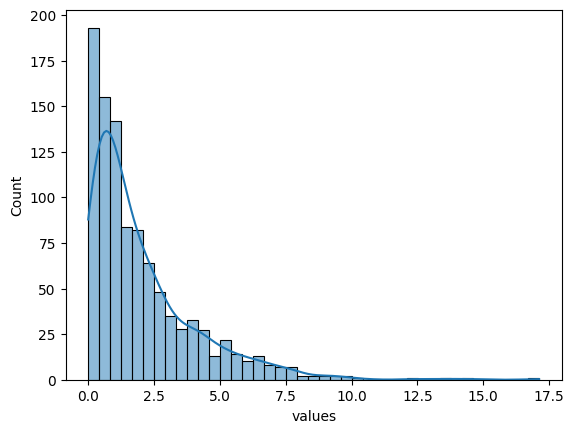

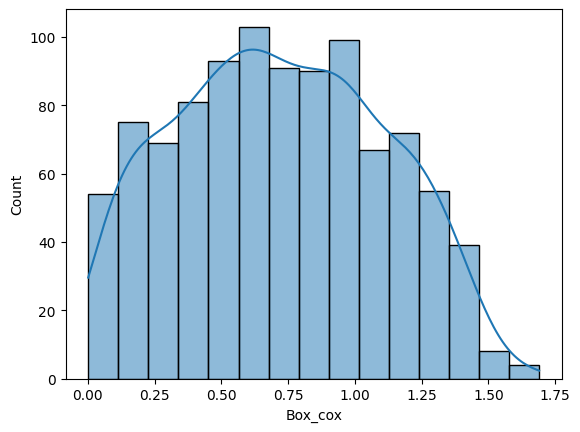

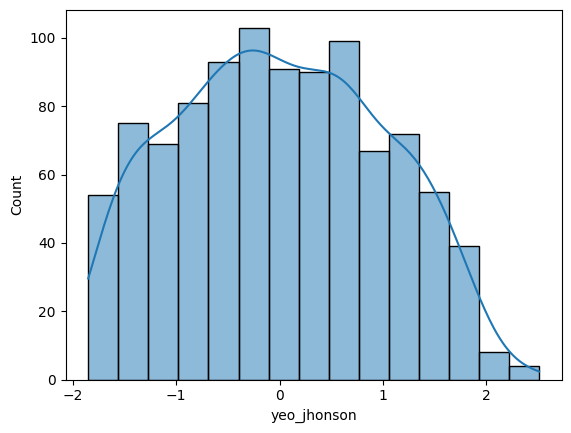

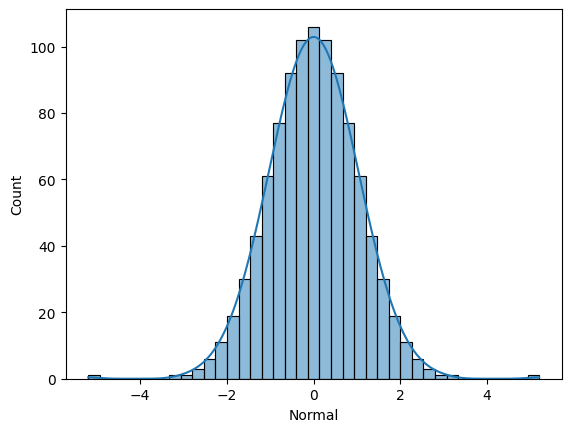

In [256]:
# create histograme for all columns
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show()

#### L2 Normalization:

Rescales each sample (row) to have unit norm. This type of normalization is often used when dealing with text data. The L2 norm is calculated as the square root of the sum of the squared vector values.

In [257]:
from sklearn.preprocessing import Normalizer
data = [[1, 1, 1], [1, 1, 0], [1, 0, 0]]
normalizer = Normalizer(norm="l2")
print(normalizer.fit_transform(data))

[[0.57735027 0.57735027 0.57735027]
 [0.70710678 0.70710678 0.        ]
 [1.         0.         0.        ]]


### L1 Normalization:

Also rescales each sample (row) but with a different approach, ensuring the sum of the absolute values is 1 in each row. The L1 norm is calculated as the sum of the absolute vector values.

In [258]:
from sklearn.preprocessing import Normalizer
data = [[1, 1, 1], [1, 1, 0], [1, 0, 0]]
normalizer = Normalizer(norm="l1")
print(normalizer.fit_transform(data))

[[0.33333333 0.33333333 0.33333333]
 [0.5        0.5        0.        ]
 [1.         0.         0.        ]]


In [259]:

df = {"Values": [1, 10, 100, 1000, 10000, 100000.1000000]}
df = pd.DataFrame(df,)
df

,Values
0,1.0
1,10.0
2,100.0
3,1000.0
4,10000.0
5,100000.1


<Axes: ylabel='Count'>

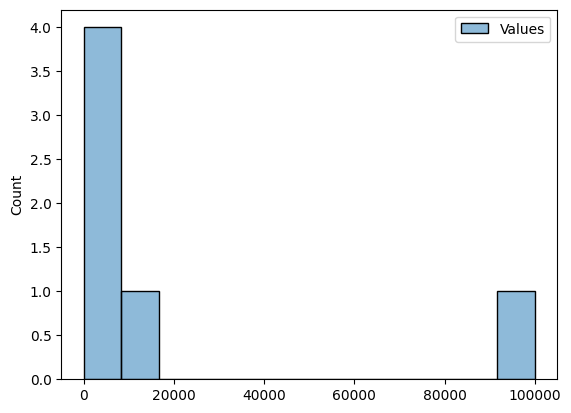

In [260]:
sns.histplot(df)

<Axes: xlabel='log_values', ylabel='Count'>

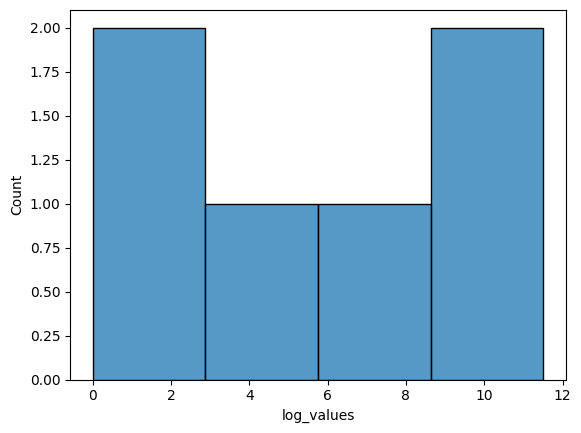

In [263]:
df['log_values'] = np.log(df['Values'])
sns.histplot(df['log_values'])